<a href="https://colab.research.google.com/github/nikolimaj/text_mining/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [ ]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv",
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv",
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv",
                       sep = ";", names = ["Label", "Article"],
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv",
                       sep = ";", names = ["Label", "Article"],
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [ ]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


,Label,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


<Axes: xlabel='Label'>

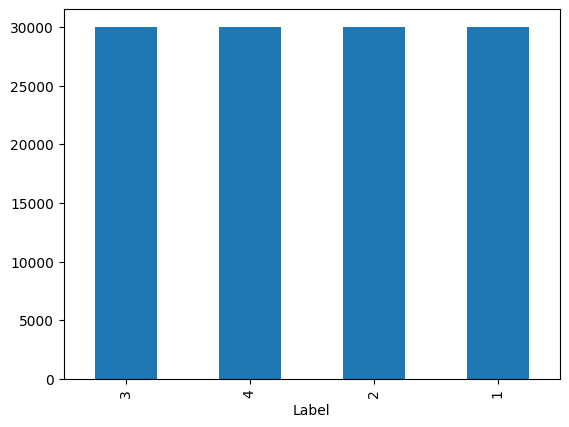

In [ ]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [ ]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


,Label,Article
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


<Axes: xlabel='Label'>

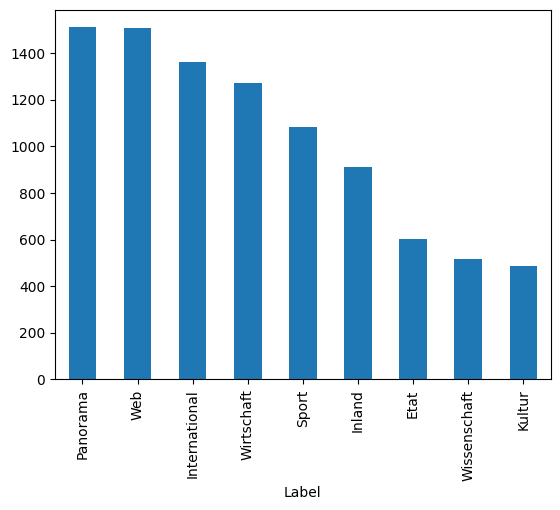

In [ ]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [ ]:
%%capture output
!python -m spacy download en_core_web_sm

In [ ]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [ ]:
%%capture output
!python -m spacy download en_core_web_lg

In [ ]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [ ]:
%%capture output
!python -m spacy download de_core_news_sm

In [ ]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [ ]:
%%capture output
!python -m spacy download de_core_news_lg

In [ ]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


### Loading models

In [ ]:
import spacy
import random
import en_core_web_lg
import de_core_news_lg

nlp_en = en_core_web_lg.load()
nlp_de = de_core_news_lg.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [ ]:
# english
r_en = random.randint(0, train_en.shape[0] - 1)
tokens_en = nlp_en(train_en["Article"].iloc[r_en])

print(train_en["Article"].iloc[r_en])
print([token_en.text for token_en in tokens_en])

Pakistan says its troops have killed six suspected al-Qaida militants in a semi-autonomous tribal region near the Afghan border. Army officials say the clash took place early Sunday in a mountainous area near 
['Pakistan', 'says', 'its', 'troops', 'have', 'killed', 'six', 'suspected', 'al', '-', 'Qaida', 'militants', 'in', 'a', 'semi', '-', 'autonomous', 'tribal', 'region', 'near', 'the', 'Afghan', 'border', '.', 'Army', 'officials', 'say', 'the', 'clash', 'took', 'place', 'early', 'Sunday', 'in', 'a', 'mountainous', 'area', 'near']


In [ ]:
# german
r_de = random.randint(0, train_de.shape[0] - 1)
tokens_de = nlp_de(train_de["Article"].iloc[r_de])

print(train_de["Article"].iloc[r_de])
print([token_de.text for token_de in tokens_de])

Exkanzler Wolfgang Schüssel wurde seinem medialen Beinamen "Schweigekanzler" im U-Ausschuss nicht gerecht. Tilo Berlin hat auch noch als Vorstandschef der Hypo Geld in die Bank gesteckt. Er empfahl der Republik, sich Geld von den Bayern zurückzuholen.. Wien – Eines einte die beiden Auskunftspersonen, die am Mittwoch vor dem parlamentarischen Hypo-U-Ausschuss ausgesagt haben. Exkanzler Wolfgang Schüssel (ÖVP) und Exbankchef und Investor Tilo Berlin schlängelten sich bei ihrer Ankunft an den vielen, vielen vor dem Budgetsaal wartenden Medienvertretern vorbei. Während Schüssel im Ausschusslokal selbst nolens volens ein Blitzlichtgewitter über sich ergehen ließ, lehnte Berlin die Ablichtung ab: Es gibt genug Fotos von mir. Exkanzler Schüssel hatte sich zuvor selbstsicher wie immer gezeigt. Manchmal ein wenig genervt (Für Sie Herr Doktor Schüssel, schulte er Team-Stronach-Mandatar Robert Lugar um), manchmal staatstragend (Hören Sie, ich war 2006 EU-Präsident. Ich weiß gar nicht, wo ich da g

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [ ]:
print(train_en["Article"].iloc[r_en])
print([token_en.lemma_ for token_en in tokens_en])

Pakistan says its troops have killed six suspected al-Qaida militants in a semi-autonomous tribal region near the Afghan border. Army officials say the clash took place early Sunday in a mountainous area near 
['Pakistan', 'say', 'its', 'troop', 'have', 'kill', 'six', 'suspect', 'al', '-', 'Qaida', 'militant', 'in', 'a', 'semi', '-', 'autonomous', 'tribal', 'region', 'near', 'the', 'afghan', 'border', '.', 'army', 'official', 'say', 'the', 'clash', 'take', 'place', 'early', 'Sunday', 'in', 'a', 'mountainous', 'area', 'near']


In [ ]:
print(train_de["Article"].iloc[r_de])
print([token_de.lemma_ for token_de in tokens_de])

Exkanzler Wolfgang Schüssel wurde seinem medialen Beinamen "Schweigekanzler" im U-Ausschuss nicht gerecht. Tilo Berlin hat auch noch als Vorstandschef der Hypo Geld in die Bank gesteckt. Er empfahl der Republik, sich Geld von den Bayern zurückzuholen.. Wien – Eines einte die beiden Auskunftspersonen, die am Mittwoch vor dem parlamentarischen Hypo-U-Ausschuss ausgesagt haben. Exkanzler Wolfgang Schüssel (ÖVP) und Exbankchef und Investor Tilo Berlin schlängelten sich bei ihrer Ankunft an den vielen, vielen vor dem Budgetsaal wartenden Medienvertretern vorbei. Während Schüssel im Ausschusslokal selbst nolens volens ein Blitzlichtgewitter über sich ergehen ließ, lehnte Berlin die Ablichtung ab: Es gibt genug Fotos von mir. Exkanzler Schüssel hatte sich zuvor selbstsicher wie immer gezeigt. Manchmal ein wenig genervt (Für Sie Herr Doktor Schüssel, schulte er Team-Stronach-Mandatar Robert Lugar um), manchmal staatstragend (Hören Sie, ich war 2006 EU-Präsident. Ich weiß gar nicht, wo ich da g

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe?
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [ ]:
"""
    Text: The original word text.
    Lemma: The base form of the word.
    POS: The simple UPOS part-of-speech tag.
    Tag: The detailed part-of-speech tag.
    Dep: Syntactic dependency, i.e. the relation between tokens.
    Shape: The word shape – capitalization, punctuation, digits.
    is alpha: Is the token an alpha character?
    is stop: Is the token part of a stop list, i.e. the most common words of the language?
"""

token_df_en = pd.DataFrame({"Text": [token_en.text for token_en in tokens_en],
                            "Lemma": [token_en.lemma_ for token_en in tokens_en],
                            "POS": [token_en.pos_ for token_en in tokens_en],
                            "Tag": [token_en.tag_ for token_en in tokens_en],
                            "Dep": [token_en.dep_ for token_en in tokens_en],
                            "Shape": [token_en.shape_ for token_en in tokens_en],
                            "is alpha": [token_en.is_alpha for token_en in tokens_en],
                            "is stop": [token_en.is_stop for token_en in tokens_en]})

token_df_en.head()

,Text,Lemma,POS,Tag,Dep,Shape,is alpha,is stop
0,Pakistan,Pakistan,PROPN,NNP,nsubj,Xxxxx,True,False
1,says,say,VERB,VBZ,ROOT,xxxx,True,False
2,its,its,PRON,PRP$,poss,xxx,True,True
3,troops,troop,NOUN,NNS,nsubj,xxxx,True,False
4,have,have,AUX,VBP,aux,xxxx,True,True


In [ ]:
from spacy import displacy

displacy.render(tokens_en, style = "dep", jupyter = True)

In [ ]:
token_df_de = pd.DataFrame({"Text": [token_de.text for token_de in tokens_de],
                            "Lemma": [token_de.lemma_ for token_de in tokens_de],
                            "POS": [token_de.pos_ for token_de in tokens_de],
                            "Tag": [token_de.tag_ for token_de in tokens_de],
                            "Dep": [token_de.dep_ for token_de in tokens_de],
                            "Shape": [token_de.shape_ for token_de in tokens_de],
                            "is alpha": [token_de.is_alpha for token_de in tokens_de],
                            "is stop": [token_de.is_stop for token_de in tokens_de]})

token_df_de.head()

,Text,Lemma,POS,Tag,Dep,Shape,is alpha,is stop
0,Exkanzler,Exkanzler,NOUN,NN,sb,Xxxxx,True,False
1,Wolfgang,Wolfgang,PROPN,NE,pnc,Xxxxx,True,False
2,Schüssel,Schüssel,PROPN,NE,nk,Xxxxx,True,False
3,wurde,werden,AUX,VAFIN,ROOT,xxxx,True,True
4,seinem,sein,DET,PPOSAT,nk,xxxx,True,True


In [ ]:
displacy.render(list(tokens_de.sents)[0], style = "dep", jupyter = True)

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [ ]:
entities_en_df = pd.DataFrame({"Text": [ent.text for ent in tokens_en.ents],
                               "Start": [ent.start_char for ent in tokens_en.ents],
                               "End": [ent.end_char for ent in tokens_en.ents],
                               "Label": [ent.label_ for ent in tokens_en.ents]})

entities_en_df.head()

,Text,Start,End,Label
0,Pakistan,0,8,GPE
1,six,37,40,CARDINAL
2,al-Qaida,51,59,ORG
3,Afghan,114,120,NORP
4,Army,129,133,ORG


In [ ]:
displacy.render(tokens_en, style = "ent", jupyter = True)

In [ ]:
entities_de_df = pd.DataFrame({"Text": [ent.text for ent in tokens_de.ents],
                               "Start": [ent.start_char for ent in tokens_de.ents],
                               "End": [ent.end_char for ent in tokens_de.ents],
                               "Label": [ent.label_ for ent in tokens_de.ents]})

entities_de_df.head()

,Text,Start,End,Label
0,Exkanzler Wolfgang Schüssel,0,27,PER
1,U-Ausschuss,80,91,MISC
2,Tilo Berlin,107,118,PER
3,Hypo,155,159,ORG
4,Republik,202,210,LOC


In [ ]:
displacy.render(tokens_de, style = "ent", jupyter = True)

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [ ]:
tokens_de.similarity(tokens_en)

-0.05108254988373718

In [ ]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

0.6646700501441956

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [ ]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(300,)
(300,)
